# MNIST 손글씨 이미지 인식 실습 <br>

Linear regression과 CNN을 이용해 손글씨 이미지 데이터셋(MNIST)을 분류합니다. <br>
동일한 epoch,batch size로 학습을 진행해 두 가지 방법간의 cost, accuracy 등을 비교해보려 합니다.

### MNIST Using Multivariable linear regression

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001, Cost: 2.808596733
Epoch: 0002, Cost: 1.142382247
Epoch: 0003, Cost: 0.910215155
Epoch: 0004, Cost: 0.793236322
Epoch: 0005, Cost: 0.720316410
Epoch: 0006, Cost: 0.669175853
Epoch: 0007, Cost: 0.630293166
Epoch: 0008, Cost: 0.599148874
Epoch: 0009, Cost: 0.573071653
Epoch: 0010, Cost: 0.551628550
Epoch: 0011, Cost: 0.532839596
Epoch: 0012, Cost: 0.516354171
Epoch: 0013, Cost: 0.502202864
Epoch: 0014, Cost: 0.489248478
Epoch: 0015, Cost: 0.477546033
Learning finished
Learning time :  16.90624165534973
Accuracy:  0.8869
Label: [2]
Prediction: [2]


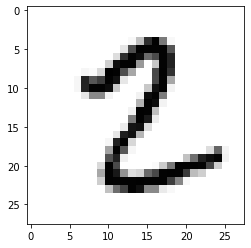

In [47]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import random
import time

tf.set_random_seed(777)

# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

start = time.time()
nb_classes = 10

# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Test model
is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# parameters
training_epochs = 15
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

cost_list1 = []

with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0

        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, c = sess.run([optimizer, cost], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch

        print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost))
        cost_list1.append(avg_cost)

    print("Learning finished")
    time1 = time.time()-start
    print("Learning time : ", time1)
    

    # Test the model using test sets

    print(
        "Accuracy: ",
        accuracy.eval(
            session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}
        ),
    )
    acc1 = accuracy.eval(session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels})
                         
    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label:", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
    print("Prediction:", sess.run(tf.argmax(hypothesis, 1),feed_dict={X: mnist.test.images[r:r + 1]}))

    plt.imshow(mnist.test.images[r:r + 1].reshape(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()

### MNIST Using CNN

Epoch: 0001 Avg. cost = 0.400
Epoch: 0002 Avg. cost = 0.145
Epoch: 0003 Avg. cost = 0.094
Epoch: 0004 Avg. cost = 0.070
Epoch: 0005 Avg. cost = 0.050
Epoch: 0006 Avg. cost = 0.041
Epoch: 0007 Avg. cost = 0.030
Epoch: 0008 Avg. cost = 0.025
Epoch: 0009 Avg. cost = 0.020
Epoch: 0010 Avg. cost = 0.018
Epoch: 0011 Avg. cost = 0.017
Epoch: 0012 Avg. cost = 0.014
Epoch: 0013 Avg. cost = 0.016
Epoch: 0014 Avg. cost = 0.011
Epoch: 0015 Avg. cost = 0.010
Learning finished
Learning time :  62.17704224586487
Accuracy: 0.9784


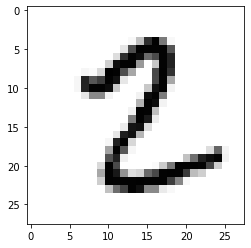

In [49]:
#########
# 신경망 모델 구성
######
# 입력 값의 차원은 [배치크기, 특성값] 으로 되어 있습니다.
# 손글씨 이미지는 28x28 픽셀로 이루어져 있고, 이를 784개의 특성값으로 정합니다.
start = time.time()
X = tf.placeholder(tf.float32, [None, 784])
# 결과는 0~9 의 10 가지 분류를 가집니다.
Y = tf.placeholder(tf.float32, [None, 10])

# 신경망의 레이어는 다음처럼 구성합니다.
# 784(입력 특성값)
#   -> 256 (히든레이어 뉴런 갯수) -> 256 (히든레이어 뉴런 갯수)
#   -> 10 (결과값 0~9 분류)
W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
# 입력값에 가중치를 곱하고 ReLU 함수를 이용하여 레이어를 만듭니다.
L1 = tf.nn.relu(tf.matmul(X, W1))

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
# L1 레이어의 출력값에 가중치를 곱하고 ReLU 함수를 이용하여 레이어를 만듭니다.
L2 = tf.nn.relu(tf.matmul(L1, W2))

W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
# 최종 모델의 출력값은 W3 변수를 곱해 10개의 분류를 가지게 됩니다.
model = tf.matmul(L2, W3)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

#########
# 신경망 모델 학습
######
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)
cost_list2 = []

for epoch in range(15):
    total_cost = 0

    for i in range(total_batch):
        # 텐서플로우의 mnist 모델의 next_batch 함수를 이용해
        # 지정한 크기만큼 학습할 데이터를 가져옵니다.
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)

        _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs, Y: batch_ys})
        total_cost += cost_val

    mean_cost = total_cost / total_batch
    cost_list2.append(mean_cost)
    print('Epoch:', '%04d' % (epoch + 1),
          'Avg. cost =', '{:.3f}'.format(mean_cost))

print("Learning finished")
time2 = time.time()-start
print("Learning time : ", time2)

#########
# Test the model using test sets
######
# model 로 예측한 값과 실제 레이블인 Y의 값을 비교합니다.
# tf.argmax 함수를 이용해 예측한 값에서 가장 큰 값을 예측한 레이블이라고 평가합니다.

is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('Accuracy:', sess.run(accuracy,
                        feed_dict={X: mnist.test.images,
                                   Y: mnist.test.labels}))
acc2 = sess.run(accuracy,feed_dict={X: mnist.test.images,Y: mnist.test.labels})
plt.imshow(mnist.test.images[r:r + 1].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

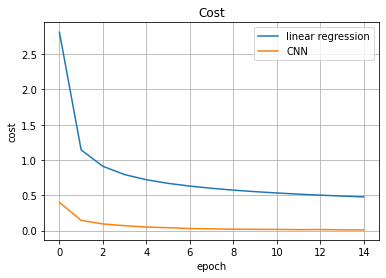

In [52]:
plt.plot(cost_list1, label = "linear regression")
plt.plot(cost_list2, label = "CNN")
plt.xlabel("epoch")
plt.ylabel("cost")
plt.title("Cost")
plt.grid()
plt.legend()

epoch이 증가할수록 linear regression과 CNN의 cost 차이가 줄기는 하나 CNN의 cost 값이 현저히 작음

Accuracy of linear regression : 0.8869 
Accuracy of CNN : 0.9784


Text(0.5, 1.0, 'Accuracy')

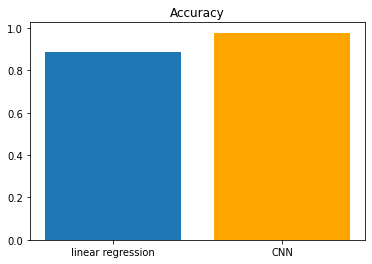

In [53]:
print("Accuracy of linear regression :", acc1, "\nAccuracy of CNN :", acc2)
plt.bar("linear regression",acc1)
plt.bar("CNN",acc2, color='orange')
plt.title("Accuracy")

Learning time of linear regression : 16.90624165534973 
Learning time of CNN : 62.17704224586487


Text(0.5, 1.0, 'Learning time')

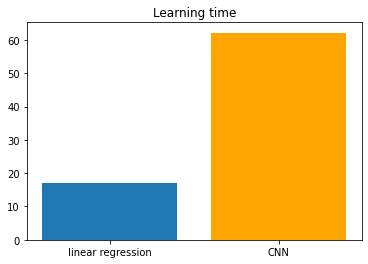

In [54]:
print("Learning time of linear regression :", time1, "\nLearning time of CNN :", time2)
plt.bar("linear regression",time1)
plt.bar("CNN",time2, color='orange')
plt.title("Learning time")

### Reference 
골빈해커의 3분 딥러닝, 한빛미디어, 김진중 <br>
https://github.com/golbin/TensorFlow-Tutorials/blob/master/06%20-%20MNIST/01%20-%20MNIST.py <br>
https://www.youtube.com/watch?v=ktd5yrki_KA&list=PLlMkM4tgfjnLSOjrEJN31gZATbcj_MpUm&index=21 <br>